### Preparation

The dataset is related to Forest Fires. For more info: https://archive.ics.uci.edu/ml/datasets/forest+fires

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Q1.

Read the csv file from the this URL https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv. Save it to a data frame called Forest. Check the first five records. (10 points)
[Relevant Pandas API](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)


In [6]:
### Reading CSV File and Loading into Data Frame
forest = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')

### Exploring the dataset
print(f"The first 5 records of the data set Forest are shown below:\n")
print(forest.head(), "\n")

print("The data types of the variables are shown below: \n")
print(forest.dtypes)

The first 5 records of the data set Forest are shown below:

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0 

The data types of the variables are shown below: 

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object


In [7]:
# Printing Descriptive Statistics
print("General descriptive statistics about the data set Forest\n") 
print(forest.describe(), "\n")

General descriptive statistics about the data set Forest

                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std  

In [154]:
print("The names of the columns are:")
print(forest.columns)

The names of the columns are:
Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area', 'fires'],
      dtype='object')


# Q2.
How many observations are there in the dataset? How many observations are there with both a significant fire (burned area > 0) and rain? (10 points) [Relevent API1](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.shape.html) , [Relevant Pandas API 2](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html#)

In [156]:
# Determining Number of Observations in the Dataset

num_rows = forest.shape[0]

print(f'\nThe number of observations in the data set are: {num_rows}')


The number of observations in the data set are: 517


In [11]:
# Determining observations with both a significant fire (burned area > 0) and rain > 0

sig_fire_and_rain = forest[(forest["area"] > 0) & (forest["rain"] > 0)]
sig_fire_rain_rows = sig_fire_and_rain.shape[0]

print(f'\nThe number of observations that contain both a significant fire burned area and rain values > 0: {sig_fire_rain_rows}')


The number of observations that contain both a significant fire burned area and rain values > 0: 2


# Q3.
Show the columns month, day, area of all the observations with a significant fire (burned area >0 ). (10 points) [Relevant Pandas API](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)

In [13]:
# Extracting number of observations with significant fire burned area > 0 for subset of columns

sig_fire = forest.loc[forest["area"] > 0, ["month", "day", "area"]]
sig_fire_rows = sig_fire.shape[0]

print(f"There are {sig_fire_rows} observations with a significant fire burned area > 0")

There are 270 observations with a significant fire burned area > 0


In [14]:
# Showing all observations with columns [ month, day, area] with a significant fire burned area > 0

print("Observations with significant fire burned area > 0\n\n", sig_fire.head(271))

Observations with significant fire burned area > 0

     month  day   area
138   jul  tue   0.36
139   sep  tue   0.43
140   sep  mon   0.47
141   aug  wed   0.55
142   aug  fri   0.61
..    ...  ...    ...
509   aug  fri   2.17
510   aug  fri   0.43
512   aug  sun   6.44
513   aug  sun  54.29
514   aug  sun  11.16

[270 rows x 3 columns]


# Q4.
How large are the five largest fires (i.e. having largest area)? (10 points) [Relevant API](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)

In [160]:
# Sorting the dataset to determine top 5 largest burned area
sorted_fires = forest.sort_values(by="area", ascending = False).head()

# Printing subset of the forest data containing the values of the largest burned area
print("The 5 largest fire burned areas in hecatares are shown below:\n", sorted_fires[["area"]])

# Displaying the largest fire burned area
largest_fire = sorted_fires.iloc[0]['area']
print(f"\nThe largest fire burned area was {largest_fire} hectares.")

The 5 largest fire burned areas in hecatares are shown below:
         area
238  1090.84
415   746.28
479   278.53
237   212.88
236   200.94

The largest fire burned area was 1090.84 hectares.


# Q5.
For the records you obtained from the previous question, what are the corresponding month, temp, RH, wind, rain, area? (10 points)

In [162]:
# Re-writing sorted data set variable
sorted_fires = forest.sort_values(by="area", ascending = False).head()

# Extracting columns of interest
expanded_sorted_fires = sorted_fires[["month","temp","RH","wind","rain","area"]]

# Printing subset of the forest data containing the values of the largest burned area
print("Subset of data that includes the largest fire burned areas in hecatares are shown below:\n", expanded_sorted_fires)


Subset of data that includes the largest fire burned areas in hecatares are shown below:
     month  temp  RH  wind  rain     area
238   sep  25.1  27   4.0   0.0  1090.84
415   aug  27.5  27   4.9   0.0   746.28
479   jul  22.6  57   4.9   0.0   278.53
237   sep  18.8  40   2.2   0.0   212.88
236   sep  18.2  46   1.8   0.0   200.94


# Q6.
For the whole dataset, reorder factor levels of month to be from Jan to Dec. (10 points)

In [20]:
# Checking the data type of column month 

print("The original data type of values in Month column:", forest['month'].dtype)

The original data type of values in Month column: object


In [21]:
# Converting from object type to categorical variable

forest['month'] = forest['month'].astype('category')

print("The current data type of values in Month column:", forest['month'].dtype)

The current data type of values in Month column: category


In [22]:
#Then, checking the factor levels order of the month variable 

month_orig = forest['month'].cat.categories

print("Original order of factor levels in column Month:", month_orig)

Original order of factor levels in column Month: Index(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov',
       'oct', 'sep'],
      dtype='object')


In [23]:
# Reording the factor levels of column Month to be from Jan-Dec
months_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

forest['month']= pd.Categorical(forest['month'], categories = months_order, ordered= True)

month_current = forest['month'].cat.categories

print("Current order of factor levels in column Month:", month_current)

Current order of factor levels in column Month: Index(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct',
       'nov', 'dec'],
      dtype='object')


In [164]:
# Checking to see if values have been sorted according to factor levels

sorted_by_month = forest.sort_values(by = 'month')

print(sorted_by_month.head())

     X  Y month  day  FFMC   DMC     DC  ISI  temp   RH  wind  rain   area  \
104  2  4   jan  sat  82.1   3.7    9.3  2.9   5.3   78   3.1   0.0   0.00   
379  4  5   jan  sun  18.7   1.1  171.4  0.0   5.2  100   0.9   0.0   0.00   
96   3  4   feb  sat  83.9   8.0   30.2  2.6  12.7   48   1.8   0.0   0.00   
59   2  2   feb  fri  86.6  13.2   43.0  5.3  12.3   51   0.9   0.0   0.00   
202  7  4   feb  sun  83.9   8.7   32.1  2.1   8.8   68   2.2   0.0  13.05   

     fires  
104  FALSE  
379  FALSE  
96   FALSE  
59   FALSE  
202   TRUE  


# Q7.
Add one column to the data indicating whether a fire occurred for each observation ('TRUE' for area>0 and 'FALSE' for area==0). (10 points)

In [166]:
# Creating a new column Fires and applying condition

forest['fires'] = np.where(forest['area']>0, True, False)

# Checking observations to ensure condition is met 
print(forest[['area','fires']].head(10))

print(forest[['area','fires']].tail(10))

   area  fires
0   0.0  False
1   0.0  False
2   0.0  False
3   0.0  False
4   0.0  False
5   0.0  False
6   0.0  False
7   0.0  False
8   0.0  False
9   0.0  False
      area  fires
507   0.00  False
508   0.00  False
509   2.17   True
510   0.43   True
511   0.00  False
512   6.44   True
513  54.29   True
514  11.16   True
515   0.00  False
516   0.00  False


# Q8.
What is the mean area/wind/temp/RH per month? (10 points)

In [178]:
# Computing the mean for area per month 
mean_perMonth = forest.groupby(by ='month', observed=False)[['area','wind','temp','RH']].mean()

print("Mean per Month\n", mean_perMonth)


Mean per Month
             area      wind       temp         RH
month                                           
jan     0.000000  2.000000   5.250000  89.000000
feb     6.275000  3.755000   9.635000  55.700000
mar     4.356667  4.968519  13.083333  40.000000
apr     8.891111  4.666667  12.044444  46.888889
may    19.240000  4.450000  14.650000  67.000000
jun     5.841176  4.135294  20.494118  45.117647
jul    14.369687  3.734375  22.109375  45.125000
aug    12.489076  4.086413  21.631522  45.489130
sep    17.942616  3.557558  19.612209  42.843023
oct     6.638000  3.460000  17.093333  37.466667
nov     0.000000  4.500000  11.800000  31.000000
dec    13.330000  7.644444   4.522222  38.444444


# Q9.
How many observations are there in each month? Visualize by using a barplot in descending order. (10 points) [Relevant API 1](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) [Relevant API  2](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

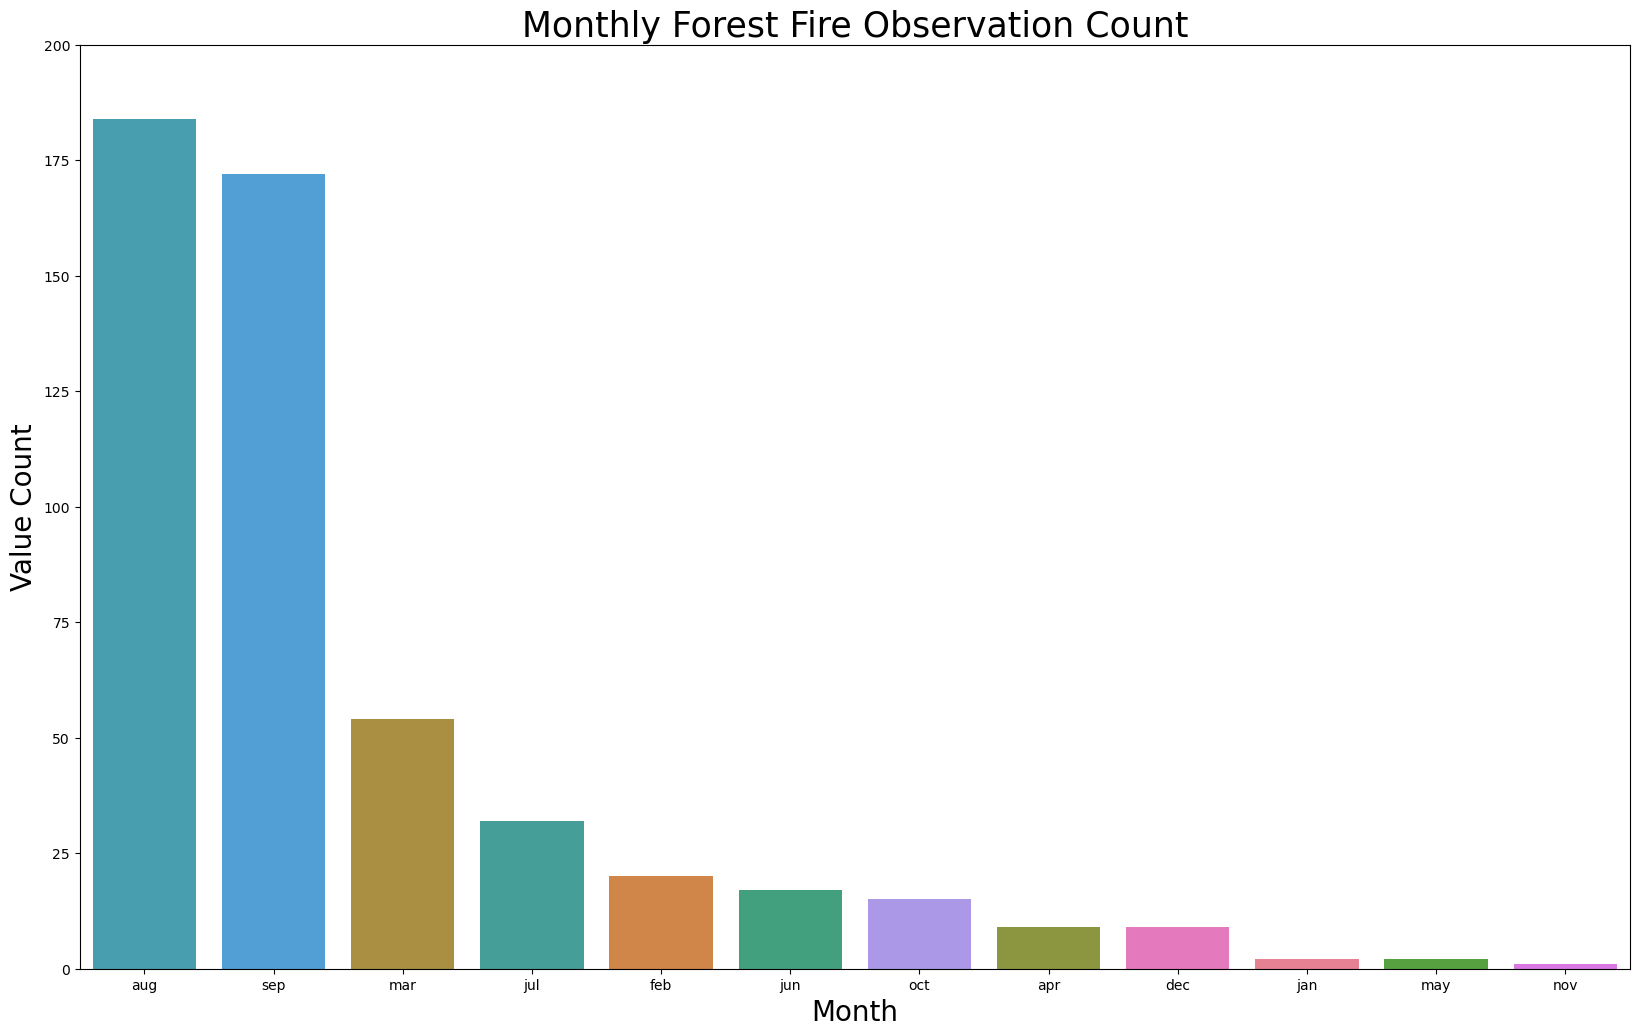

In [182]:
#Sorting Months based on value counts in descending order
sorted_months = forest['month'].value_counts().index

# Adjusting figure size 
plt.figure(figsize=(20,12))

# Plotting bar graph using the value count of observations per month 
sns.countplot(x='month', data = forest, order = sorted_months, hue= 'month')

# Adjusting y-axis limits
plt.ylim(0,200)

# Adding labels
plt.title('Monthly Forest Fire Observation Count', fontsize = 25)
plt.ylabel('Value Count', fontsize = 20)
plt.xlabel('Month', fontsize = 20)

plt.show()

# Q10.
How many observations are there with burned area greater than zero in each month? Visualize by using a barplot in descending order. (10 points)

In [184]:
# Filter data by condition
filtered_area = forest[forest['area'] > 0]

# Group by 'month' and count the number of observations
burned_area_counts = filtered_area['month'].value_counts().reset_index()

# Renaming columns
burned_area_counts.columns = ['month', 'count']

# Sort the data
burned_area_counts = burned_area_counts.sort_values(by='count', ascending=False)

print("Monthly observations with burned area > 0 shown below:\n", burned_area_counts)

Monthly observations with burned area > 0 shown below:
    month  count
0    aug     99
1    sep     97
2    mar     19
3    jul     18
4    feb     10
5    dec      9
6    jun      8
7    oct      5
8    apr      4
9    may      1
10   jan      0
11   nov      0


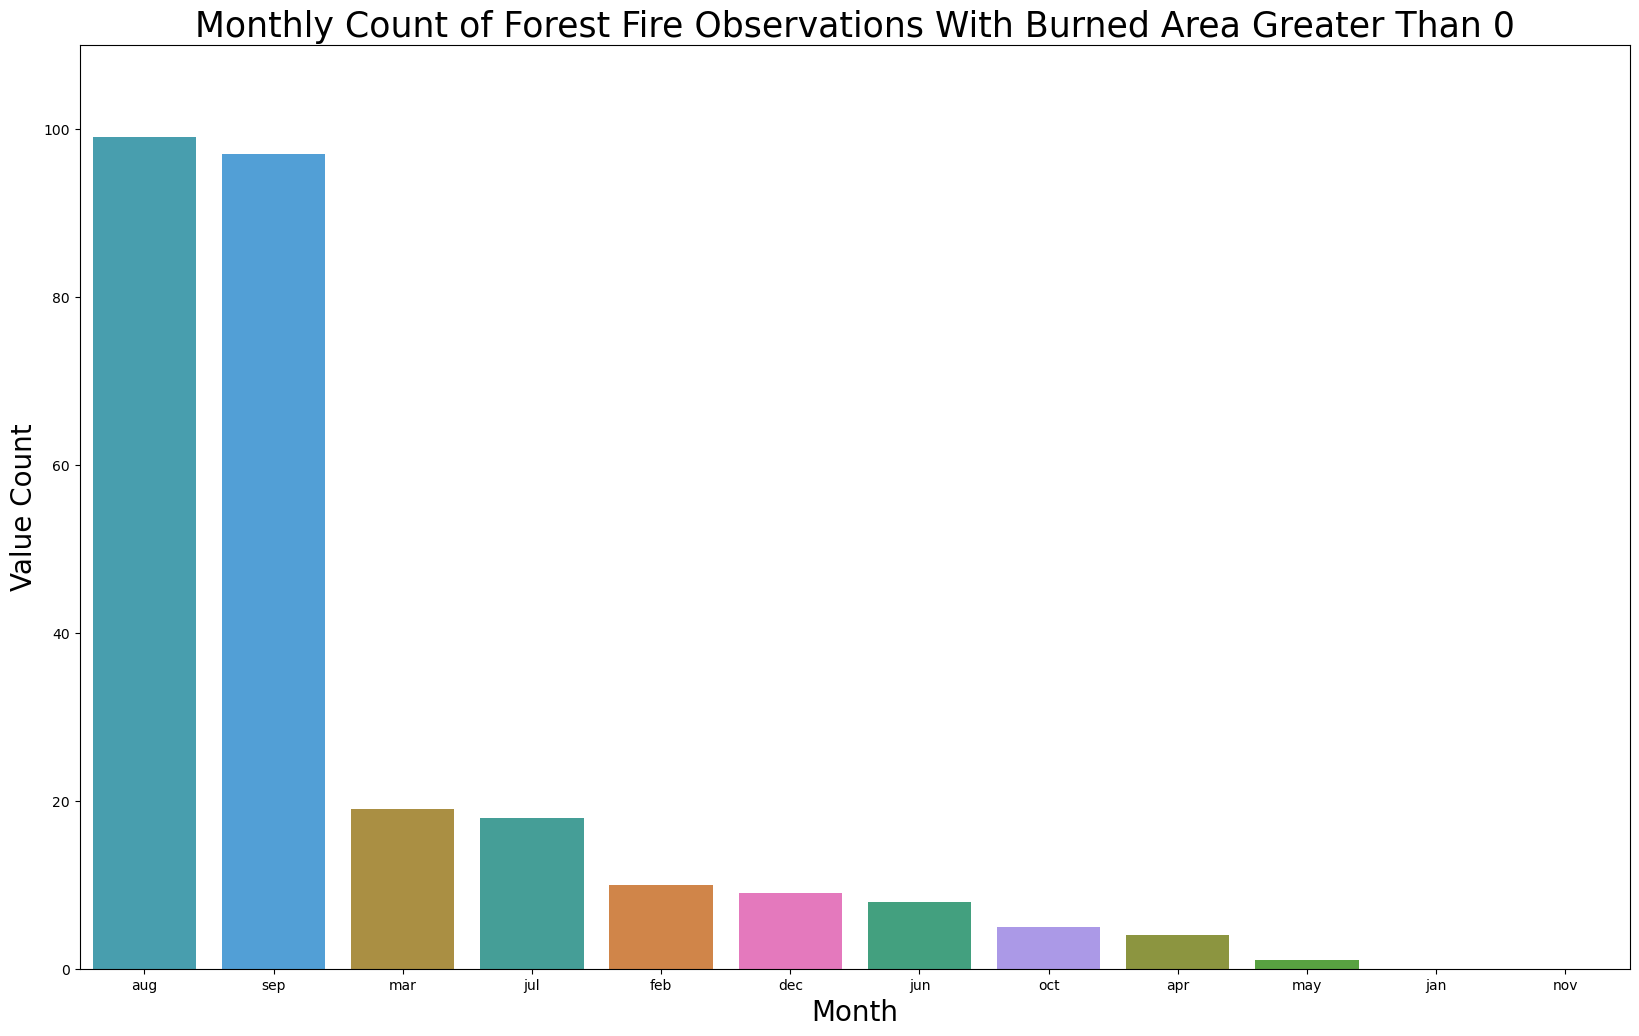

In [186]:
# Adjusting figure size 
plt.figure(figsize=(20,12))

# Plotting bar graph using the value count of observations per month 
sns.barplot(x='month', y= 'count', data = burned_area_counts, order = burned_area_counts['month'], hue= 'month')

# Adjusting y-axis limits
plt.ylim(0,110)

# Adding labels
plt.title('Monthly Count of Forest Fire Observations With Burned Area Greater Than 0', fontsize = 25)
plt.ylabel('Value Count', fontsize = 20)
plt.xlabel('Month', fontsize = 20)

plt.show()